In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#importing various functions to perform regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
#importing metrics for tabulating the result
from sklearn.metrics import mean_squared_log_error
#seting the plot size using rcParams
plt.rcParams['figure.figsize']=[15,8]

In [4]:
df=pd.read_csv('train1.csv')
df_test=pd.read_csv('test1.csv')

In [5]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
df.shape

(19237, 18)

In [7]:
#assigning target variable
y=df['Price']

In [8]:
df_test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [9]:
df_test.shape

(8245, 18)

In [10]:
#concatenting both the datasets so that we can perform all the rectification tasks on both data together
df=df.drop(['Price'],axis=1)
df_test=df_test.drop(['Price'],axis=1)
df_merge=df.append(df_test)
df_merge.reset_index(inplace=True)
df_merge=df_merge.drop(['index'],axis=1)

In [11]:
df_merge.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [12]:
df_merge.shape

(27482, 17)

In [13]:
#checking the data types and unique values
info=pd.DataFrame()
info['DataTypes']=df_merge.dtypes
info['Unique_values']=df_merge.nunique()
info

,DataTypes,Unique_values
ID,int64,26886
Levy,object,635
Manufacturer,object,68
Model,object,1981
Prod. year,int64,59
Category,object,11
Leather interior,object,2
Fuel type,object,7
Engine volume,object,112
Mileage,object,9977


In [14]:
df_merge['Cylinders'].nunique()

16

In [15]:
df_merge['Cylinders'].unique()

array([  6.,   4.,   8.,   1.,  12.,   3.,   2.,  16.,   5.,   7.,   9.,
        10.,  14., 127.,  11.,  15.])

In [16]:
df_merge.describe(include='object')

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482
unique,635,68,1981,11,2,7,112,9977,4,3,3,2,16
top,-,HYUNDAI,Sonata,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,8273,5358,1557,12534,19926,14492,5587,1013,19296,18374,26173,25384,7196


In [17]:
df_merge.describe(include=np.number)

,ID,Prod. year,Cylinders,Airbags
count,2.748200e+04,27482.000000,27482.000000,27482.000000
mean,4.557857e+07,2010.912452,4.593734,6.563569
std,9.244972e+05,5.632865,1.413918,4.329256
min,2.074688e+07,1939.000000,1.000000,0.000000
25%,4.569808e+07,2009.000000,4.000000,4.000000
50%,4.577207e+07,2012.000000,4.000000,6.000000
75%,4.580197e+07,2015.000000,4.000000,12.000000
max,4.581665e+07,2020.000000,127.000000,16.000000


# Rectifying the data

In [18]:
#removing the 'km' from thr mileage column and cnverting it to float
df_merge['Mileage']=pd.to_numeric(df_merge.Mileage.str.split(' ').str[0],downcast='float')

In [19]:
df_merge.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [20]:
#replacing all the '0' values with the mean values of the 'Mileage' column
df_merge['Mileage'] = np.where(df_merge['Mileage'] == 0.0,df_merge['Mileage'].mean(),df_merge['Mileage'])

In [21]:
#checking the unique values of 'Doors' column
df_merge['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [22]:
#cleaning the Doors column
df_merge['Doors'] = np.where((df_merge['Doors'] == '04-May') | (df_merge['Doors'] == '02-Mar'), df_merge['Doors'].str.split('-').str[0],df_merge['Doors'])

In [23]:
#checking the unique values of 'Doors' column after cleaning
df_merge['Doors'].unique()

array(['04', '02', '>5'], dtype=object)

In [24]:
#checking the unique values of 'Levy' column after cleaning
df_merge['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [25]:
#converting the Levy column to float as it is the Tax 
df_merge['Levy'] = pd.to_numeric(df_merge['Levy'].replace('-', '0'), downcast='float')

In [26]:
#Replacing the 0 in the 'Levy' column with mean of that column
df_merge['Levy'] = np.where(df_merge['Levy'] == 0.0,df_merge['Levy'].mean(),df_merge['Levy'])

In [27]:
#checking the unique values in the 'Engine volume' column
df_merge['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [28]:
#We can see that there are some values with 'Turbo' and some values without 'Turbo'
#So we remove the word 'Turbo' from all records that have it
df_merge['Engine volume'] = pd.to_numeric(df_merge['Engine volume'].str.split(' ').str[0], downcast='float')

In [29]:
#Replacing the '0' in the 'Engine volume' column with the mean value of that column
df_merge['Engine volume']=np.where(df_merge['Engine volume'] == 0.0,df_merge['Engine volume'].mean(),df_merge['Engine volume'])

In [30]:
#Feature engineering the production year column
import datetime as dt
currt_time = dt.datetime.now()
df_merge['Prod. year'] = currt_time.year - df_merge['Prod. year'] 

In [31]:
#Checking the dataset after all the retification
df_merge.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399.000000,LEXUS,RX 450,12,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Left wheel,Silver,12
1,44731507,1018.000000,CHEVROLET,Equinox,11,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04,Left wheel,Black,8
2,45774419,636.172974,HONDA,FIT,16,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Right-hand drive,Black,2
3,45769185,862.000000,FORD,Escape,11,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,Left wheel,White,0
4,45809263,446.000000,HONDA,FIT,8,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Left wheel,Silver,4


# Extrapolatory data analysis

<function matplotlib.pyplot.show(close=None, block=None)>

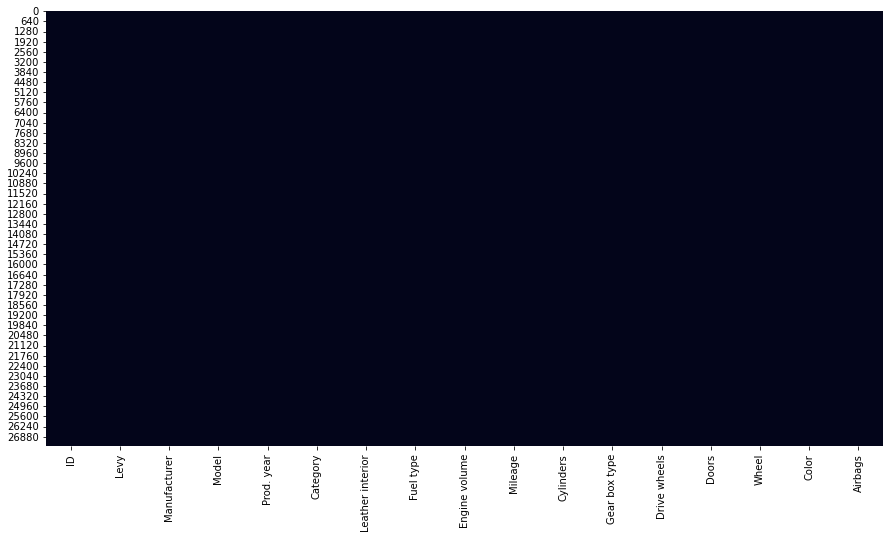

In [32]:
sns.heatmap(df_merge.isnull(),cbar=False)
plt.show

<AxesSubplot:>

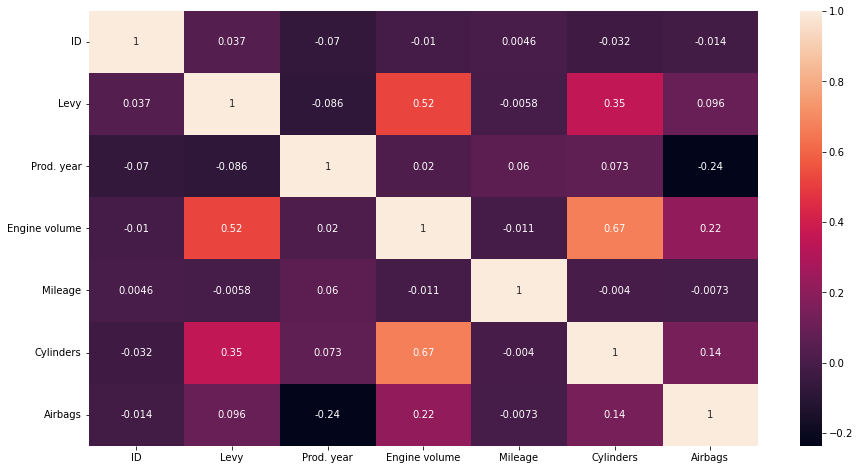

In [33]:
sns.heatmap(df_merge.corr(), cbar=True, annot=True)

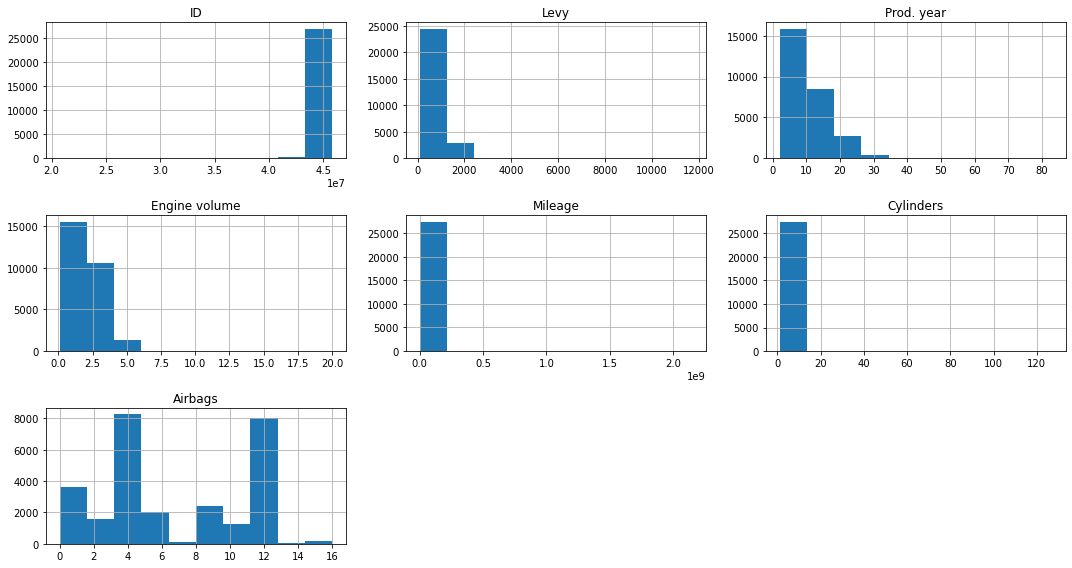

In [34]:
#distribution of numeric variables
df_merge.hist()
plt.tight_layout()
plt.show()

In [35]:
#shapiro test to check the skewness of the target variable
from scipy.stats import shapiro
x = shapiro(y)
if x[1] <= 0:
    print('Negatively skewed')
else:
    print('Positively Skewed')

Negatively skewed


In [36]:
#As from the shapiro test we can see that 'Price' column is negatively skewed we need to normlize it
y = np.log(y)

# Building the models

In [37]:
categ = df_merge.select_dtypes(include='object')
num = df_merge.select_dtypes(include = np.number)

In [38]:
#getting dummies for the categorical variables
cat_dummies = pd.get_dummies(categ,drop_first=True)

In [39]:
#creating the final dataset
df_final = pd.concat([num,cat_dummies], axis=1)

In [40]:
#checking the shape of the final dataset
df_final.shape

(27482, 2094)

In [41]:
#segregating the training and test data before model building
train_data = df_final.iloc[:19237]
train_data.shape

(19237, 2094)

In [42]:
test_data = df_final.iloc[19237:]
test_data.shape

(8245, 2094)

In [43]:
#splitting the data into test and train
X = train_data
Y=y

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=10)

In [44]:
#Randomized Search CV for searching the best parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [45]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [46]:
rf_model = RandomForestRegressor()

In [47]:
rf_random_model = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [48]:
rf_random_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  24.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  24.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
#getting the best parameters
rf_random_model.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

# Feature selection using extra free regressor

In [50]:
reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)
ExtraTreesRegressor()

ExtraTreesRegressor()

In [51]:
#finding important features
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)

In [52]:
pd.DataFrame(feat_importances.nlargest(30)).index

Index(['Airbags', 'Mileage', 'Prod. year', 'ID', 'Gear box type_Tiptronic',
       'Leather interior_Yes', 'Levy', 'Manufacturer_HYUNDAI',
       'Fuel type_Hybrid', 'Engine volume', 'Fuel type_Diesel', 'Color_White',
       'Color_Black', 'Drive wheels_Front', 'Model_FIT', 'Color_Silver',
       'Color_Grey', 'Wheel_Right-hand drive', 'Cylinders',
       'Manufacturer_SSANGYONG', 'Category_Sedan', 'Category_Jeep',
       'Manufacturer_TOYOTA', 'Gear box type_Variator', 'Fuel type_Petrol',
       'Drive wheels_Rear', 'Color_Blue', 'Model_Prius', 'Category_Hatchback',
       'Manufacturer_LEXUS'],
      dtype='object')

In [53]:
#instantiating the randomforest regressor using the best parameters
mod4 = RandomForestRegressor(n_estimators= 1000, max_depth= 25,
 max_features= 'sqrt',
 min_samples_leaf=1,
 min_samples_split = 2
 )

In [54]:
X1 = train_data[['Airbags', 'Mileage', 'Prod. year', 'ID', 'Gear box type_Tiptronic',
       'Leather interior_Yes', 'Levy', 'Fuel type_Diesel', 'Engine volume',
       'Manufacturer_HYUNDAI', 'Fuel type_Hybrid', 'Color_White',
       'Color_Black', 'Drive wheels_Front', 'Model_FIT', 'Color_Grey',
       'Color_Silver', 'Cylinders', 'Wheel_Right-hand drive', 'Category_Sedan',
       'Manufacturer_TOYOTA', 'Category_Jeep', 'Gear box type_Variator',
       'Manufacturer_SSANGYONG', 'Fuel type_Petrol', 'Drive wheels_Rear',
       'Model_Prius']]
y1=y

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.3, random_state=10)

In [55]:
#fitting the model
model = mod4.fit(X1_train, y1_train)

In [56]:
#predicting the data
y_predict=model.predict(X1_test)

In [57]:
#calculating the RMLSE score
RMLSE=np.sqrt(mean_squared_log_error(np.exp(y1_test),np.exp(y_predict)))

In [58]:
#Printing the RMLSE score
RMLSE

0.842728351779656

# Finding best features using random forest regressor

In [59]:
mod3 = RandomForestRegressor(n_estimators= 1000, max_depth= 25,
 max_features= 'sqrt',
 min_samples_leaf=1,
 min_samples_split = 2
 )

In [60]:
model_random = mod3.fit(X_train, y_train)

In [61]:
feat_importances = pd.Series(model_random.feature_importances_, index=X_train.columns)

In [62]:
pd.DataFrame(feat_importances.nlargest(50)).index

Index(['ID', 'Mileage', 'Airbags', 'Prod. year', 'Levy',
       'Gear box type_Tiptronic', 'Engine volume', 'Fuel type_Hybrid',
       'Leather interior_Yes', 'Fuel type_Diesel', 'Manufacturer_HYUNDAI',
       'Cylinders', 'Fuel type_Petrol', 'Color_White', 'Drive wheels_Front',
       'Color_Black', 'Category_Sedan', 'Category_Jeep', 'Color_Grey',
       'Color_Silver', 'Wheel_Right-hand drive', 'Model_Santa FE',
       'Gear box type_Variator', 'Category_Hatchback', 'Model_FIT',
       'Manufacturer_SSANGYONG', 'Manufacturer_TOYOTA', 'Model_E 350',
       'Drive wheels_Rear', 'Color_Blue', 'Manufacturer_HONDA', 'Model_H1',
       'Model_Prius', 'Model_Tucson', 'Manufacturer_LEXUS',
       'Gear box type_Manual', 'Manufacturer_MERCEDES-BENZ', 'Fuel type_LPG',
       'Model_Camry', 'Model_Escape', 'Manufacturer_BMW', 'Doors_04',
       'Model_Actyon', 'Model_RX 450', 'Color_Red', 'Model_ML 350',
       'Model_REXTON', 'Manufacturer_NISSAN', 'Model_Sonata',
       'Category_Minivan'],
 

In [63]:
X2=train_data[['Airbags', 'Mileage', 'Prod. year', 'ID', 'Gear box type_Tiptronic',
       'Leather interior_Yes', 'Levy', 'Fuel type_Diesel', 'Engine volume',
       'Manufacturer_HYUNDAI', 'Fuel type_Hybrid', 'Color_White',
       'Color_Black', 'Drive wheels_Front', 'Model_FIT', 'Color_Grey',
       'Color_Silver', 'Cylinders', 'Wheel_Right-hand drive', 'Category_Sedan',
       'Manufacturer_TOYOTA', 'Category_Jeep', 'Gear box type_Variator',
       'Manufacturer_SSANGYONG', 'Fuel type_Petrol', 'Drive wheels_Rear',
       'Model_Prius', 'Color_Blue', 'Category_Hatchback']]
Y2=y

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y2, test_size=0.3, random_state=10)

In [64]:
model1 = mod4.fit(X2_train, y2_train)

In [65]:
y_pred=model1.predict(X2_test)

In [66]:
RMLSE1=np.sqrt(mean_squared_log_error(np.exp(y2_test),np.exp(y_pred)))

# Predicting the 'Price' for datasets

In [67]:
#selecting the columns from test_data
z=test_data[['Airbags', 'Mileage', 'Prod. year', 'ID', 'Gear box type_Tiptronic',
       'Leather interior_Yes', 'Levy', 'Fuel type_Diesel', 'Engine volume',
       'Manufacturer_HYUNDAI', 'Fuel type_Hybrid', 'Color_White',
       'Color_Black', 'Drive wheels_Front', 'Model_FIT', 'Color_Grey',
       'Color_Silver', 'Cylinders', 'Wheel_Right-hand drive', 'Category_Sedan',
       'Manufacturer_TOYOTA', 'Category_Jeep', 'Gear box type_Variator',
       'Manufacturer_SSANGYONG', 'Fuel type_Petrol', 'Drive wheels_Rear',
       'Model_Prius']]

In [68]:
#predicting the 'Price' column for test data
test_data_predicted = model.predict(z)
#converting the data into exponential data
dt2 = pd.DataFrame(np.exp(test_data_predicted))
#renaming the column
dt2.rename(columns={0:'Price'},inplace=True)

ValueError: X has 27 features, but RandomForestRegressor is expecting 29 features as input.

In [69]:
#submission
dt2.to_csv("current.csv",index=False)

NameError: name 'dt2' is not defined